# Overhead experiment, various state sizes
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/17dd83dd193654dea32735d24d737a023734bb25 

In [22]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [11, 8]
rcParams['figure.dpi'] = 600 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [23]:
fiftykb_data = pd.read_csv("without_runtime/50KB_one_invocation.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fiftykb_data = fiftykb_data[fiftykb_data[column] < fiftykb_data[column].quantile(0.95)]
    
fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,4855.998895,4855.998895,0.027995,0.044431,0.009375,0.007077
std,2931.749959,2931.749959,0.003841,0.005002,0.001213,0.000803
min,0.000000,0.000000,0.022113,0.036609,0.007006,0.005328
25%,2261.750000,2261.750000,0.024817,0.040450,0.008327,0.006391
50%,4698.500000,4698.500000,0.027252,0.044055,0.009362,0.007024
75%,7530.250000,7530.250000,0.030613,0.047299,0.010381,0.007740
max,9996.000000,9996.000000,0.043820,0.064741,0.012495,0.008779


In [24]:
fivehundredkb_data = pd.read_csv("without_runtime/500KB_one_invocation.csv")

columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fivehundredkb_data = fivehundredkb_data[fivehundredkb_data[column] < fivehundredkb_data[column].quantile(0.95)]
    
fivehundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,4815.465864,4815.465864,0.134899,0.046784,0.010434,0.008446
std,2749.327663,2749.327663,0.015121,0.005154,0.001076,0.000722
min,1.000000,1.000000,0.105155,0.038257,0.007875,0.006428
25%,2484.750000,2484.750000,0.124776,0.043288,0.009629,0.007908
50%,4749.500000,4749.500000,0.131716,0.045795,0.010358,0.008486
75%,7071.250000,7071.250000,0.140698,0.048968,0.011161,0.009002
max,9998.000000,9998.000000,0.196281,0.069166,0.013875,0.010008


In [25]:
fivemb_data = pd.read_csv("without_runtime/5MB_one_invocation.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fivemb_data = fivemb_data[fivemb_data[column] < fivemb_data[column].quantile(0.95)]
    
fivemb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4797.516026,4797.516026,6.291504,0.060367,0.014665,0.010481
std,2923.484989,2923.484989,1.597524,0.010653,0.002963,0.001034
min,0.000000,0.000000,3.204221,0.042845,0.009742,0.008033
25%,2226.500000,2226.500000,6.635776,0.053198,0.012412,0.009836
50%,4715.000000,4715.000000,6.902145,0.057454,0.014073,0.010403
75%,7342.500000,7342.500000,7.278304,0.066332,0.016462,0.010951
max,9999.000000,9999.000000,8.216450,0.090254,0.025436,0.014194


In [26]:
fiftymb_data = pd.read_csv("without_runtime/50MB_one_invocation.csv")

columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fiftymb_data = fiftymb_data[fiftymb_data[column] < fiftymb_data[column].quantile(0.95)]
    
fiftymb_data.describe()

fiftymb_data.std()

Unnamed: 0                      2884.746823
REPETITION                      2884.746823
STATE_SERIALIZATION_DURATION       3.205027
EVENT_SERIALIZATION_DURATION       0.006437
ROUTING_DURATION                   0.002207
ACTOR_CONSTRUCTION                 0.000467
dtype: float64

In [6]:
fiftykb_mean = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50KB")
fivehundredkb_mean = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="500KB")
fivemb_mean = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="5MB")
fiftymb_mean = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50MB")


fiftykb_std = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50KB")
fivehundredkb_std = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="500KB")
fivemb_std = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="5MB")
fiftymb_std = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50MB")


overhead_mean = pd.concat([fiftykb_mean, fivehundredkb_mean, fivemb_mean, fiftymb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, fivehundredkb_std, fivemb_std, fiftymb_std], axis=1)
print(overhead_mean)
print(overhead_std)

                                  50KB     500KB       5MB       50MB
ACTOR_CONSTRUCTION            0.007077  0.008446  0.010481   0.009782
ROUTING_DURATION              0.009375  0.010434  0.014665   0.017146
EVENT_SERIALIZATION_DURATION  0.044431  0.046784  0.060367   0.060284
STATE_SERIALIZATION_DURATION  0.027995  0.134899  6.291504  88.250405
                                  50KB     500KB       5MB      50MB
ACTOR_CONSTRUCTION            0.000803  0.000722  0.001034  0.000467
ROUTING_DURATION              0.001213  0.001076  0.002963  0.002207
EVENT_SERIALIZATION_DURATION  0.005002  0.005154  0.010653  0.006437
STATE_SERIALIZATION_DURATION  0.003841  0.015121  1.597524  3.205027


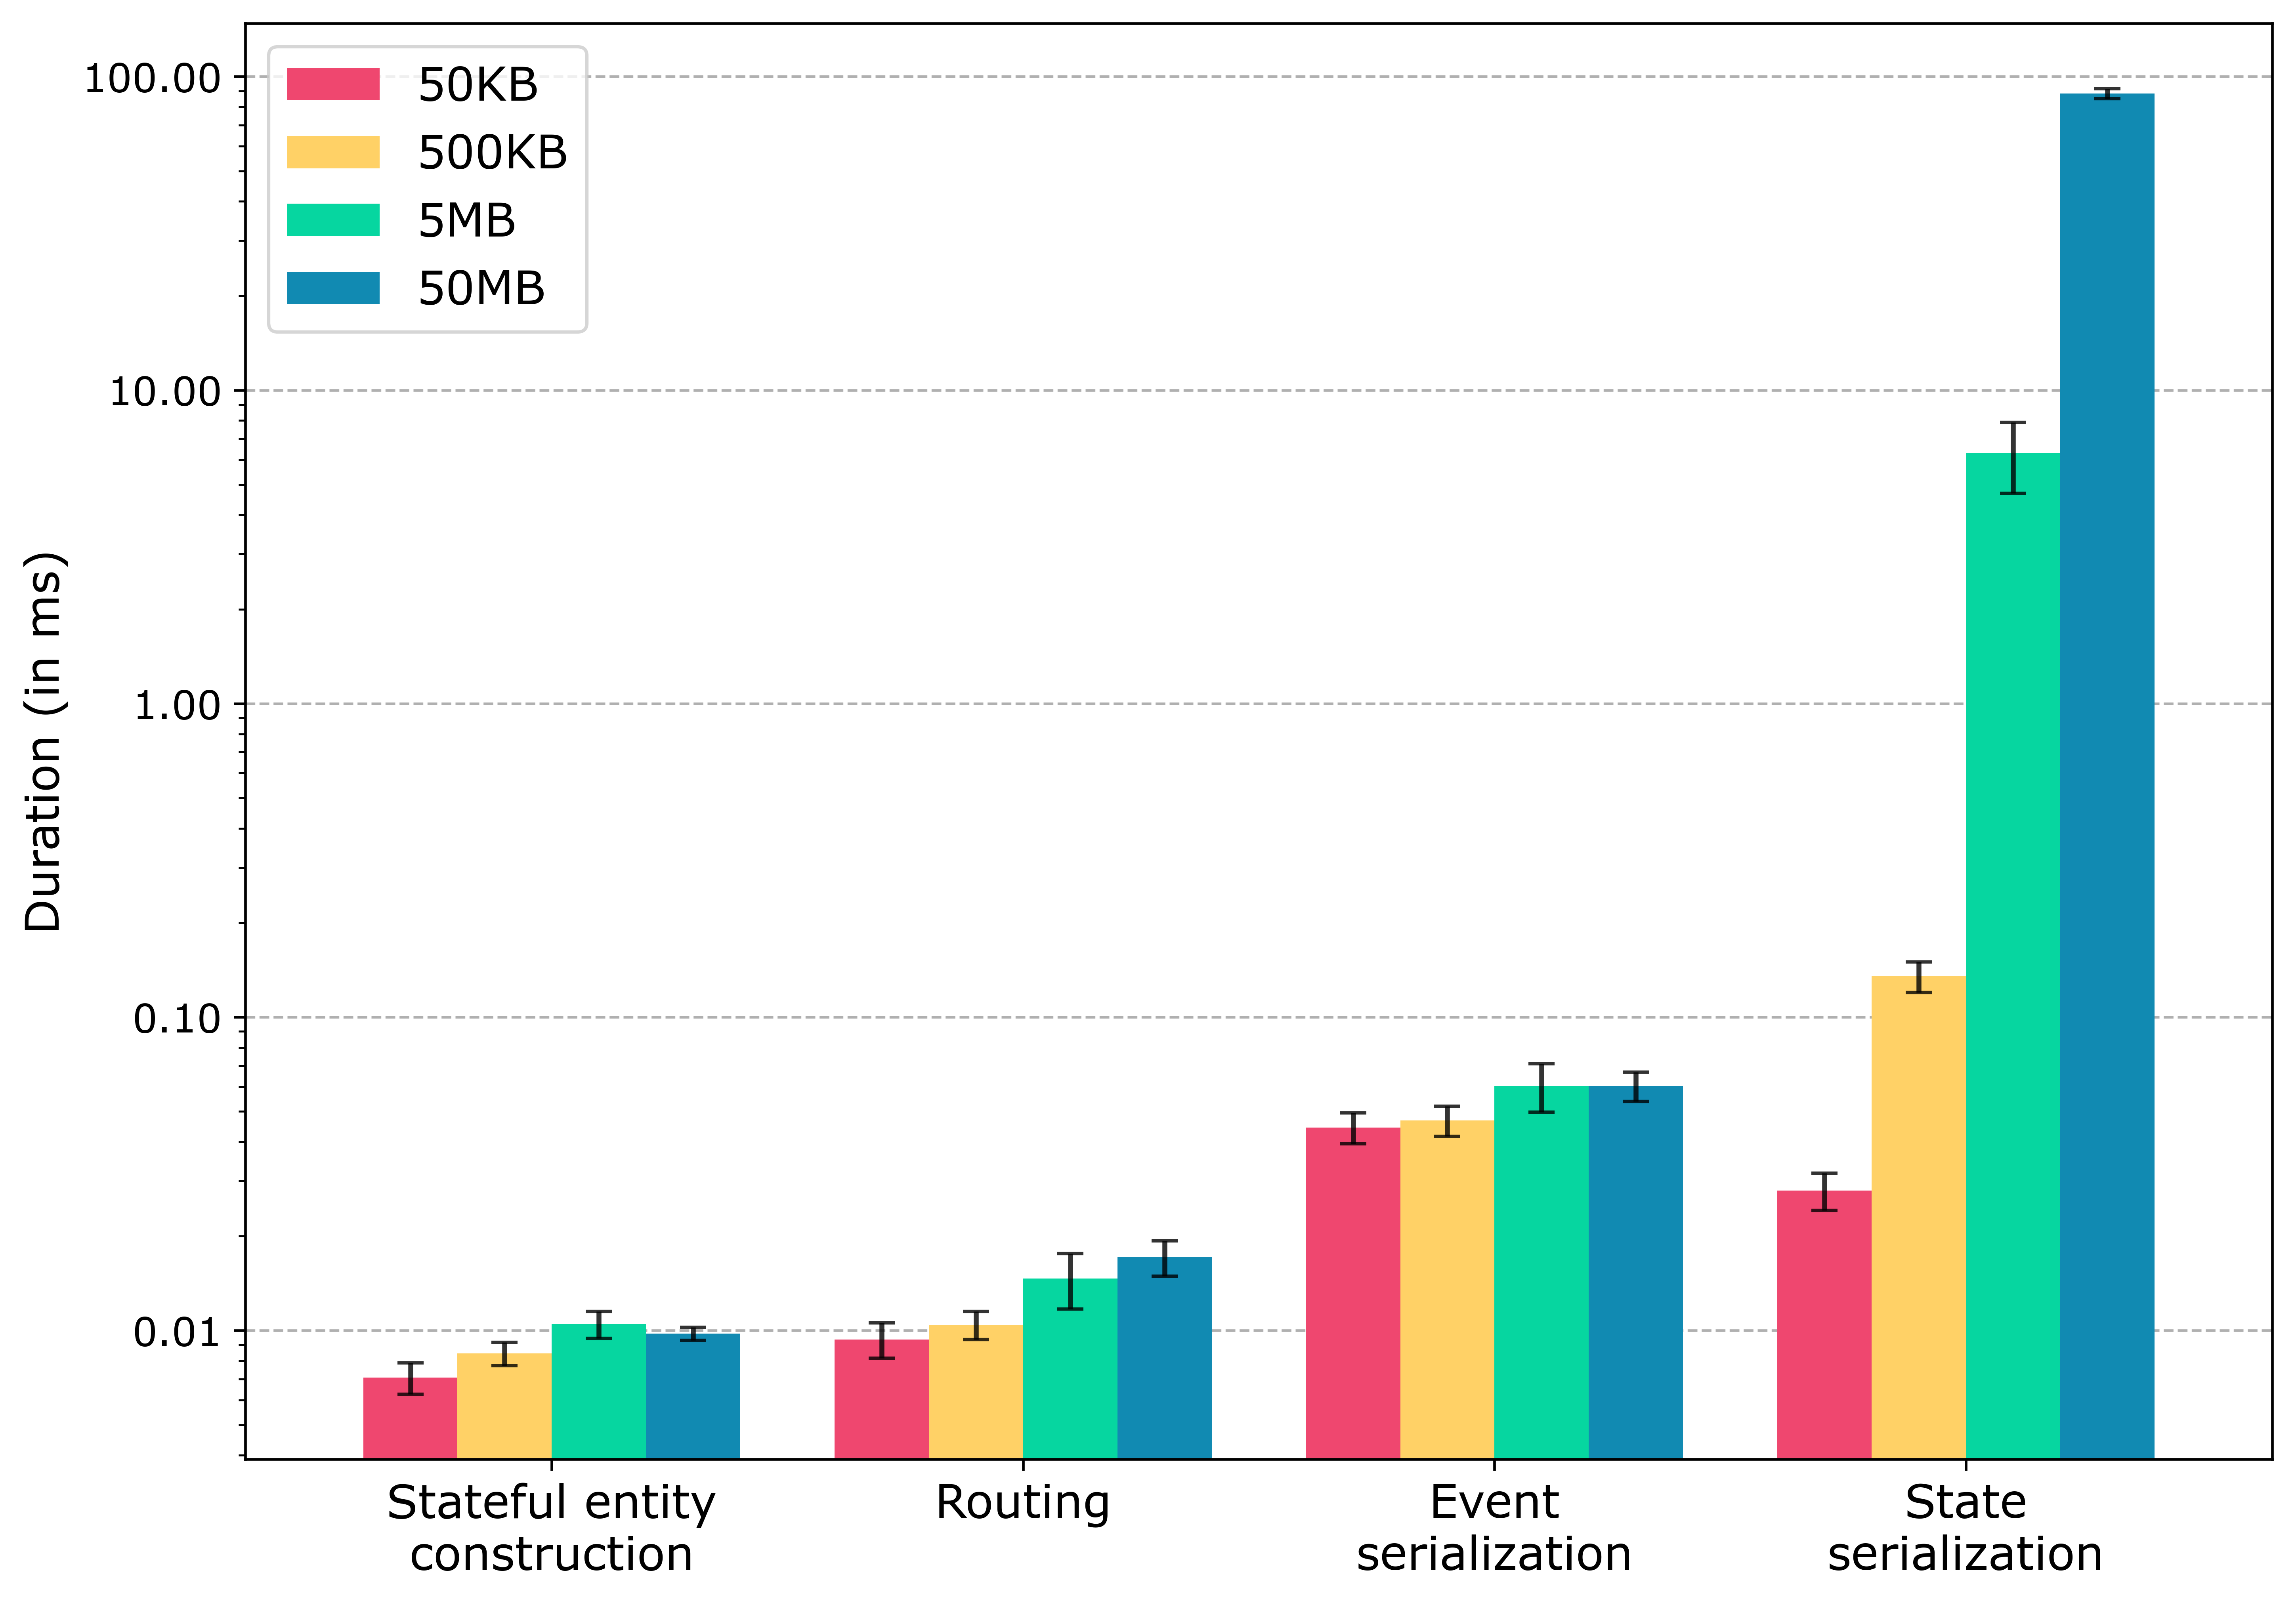

In [27]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful entity\nconstruction", "Routing", "Event\nserialization", "State\nserialization"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
new_overhead = overhead_mean.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()
new_std = overhead_std.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()

ax = new_overhead.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=new_std, rot=0, fontsize=12, capsize=4, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_title(r"Duration of actions in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.show()

In [ ]:
actor = overhead_mean.loc["ACTOR_CONSTRUCTION"]
route = overhead_mean.loc["ROUTING_DURATION"]
event = overhead_mean.loc["EVENT_SERIALIZATION_DURATION"]
state = overhead_mean.loc["STATE_SERIALIZATION_DURATION"]

actor_std = overhead_std.loc["ACTOR_CONSTRUCTION"]
route_std = overhead_std.loc["ROUTING_DURATION"]
event_std = overhead_std.loc["EVENT_SERIALIZATION_DURATION"]
state_std = overhead_std.loc["STATE_SERIALIZATION_DURATION"]

x = [50, 500, 5000, 50000]
plt.fill_between(x, actor-actor_std, actor+actor_std, color="#ef476f",  alpha=0.2)
plt.fill_between(x, route-route_std, route+route_std, color="#ffd166",   alpha=0.2)
plt.fill_between(x, event-event_std, event+event_std, color="#06d6a0",alpha=0.2)
plt.fill_between(x, state-state_std, state+state_std, color="#118ab2",alpha=0.2)

plt.plot(x, actor, color="#ef476f", label="Stateful function construction", linewidth=2)
plt.plot(x, route, color="#ffd166", label="Routing", linewidth=2)
plt.plot(x, event, color="#06d6a0", label="Event serialization", linewidth=2)
plt.plot(x, state, color="#118ab2", label="State serialization", linewidth=2)

plt.plot(x, actor, 'o', color="gray")
plt.plot(x, route, 'o', color="gray")
plt.plot(x, event,'o', color="gray")
plt.plot(x, state, 'o',color="gray")

plt.errorbar(x, actor, actor_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, route, route_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, event, event_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, state, state_std, linestyle="None", marker='o',color="gray")
ax = plt.gca()

plt.yscale('log')
plt.xscale('log')
plt.xticks(x, ["50KB", "500KB", "5MB", "50MB"])
plt.ylabel("Duration (in ms)",fontsize=14)
plt.xlabel("State size", fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.legend()
plt.title(r"The increase in duration of $Stateflow$ actions for different state sizes.")
plt.show()


# Overhead experiment, various execution graph lengths, no interaction
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/b41816f9db2e497cdf4d0ee0e7168522166c2d68

In [ ]:
eg_10_data = pd.read_csv("without_runtime/execution_graph_length_10.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_10_data = eg_10_data[eg_10_data[column] < eg_10_data[column].quantile(0.95)]
    
eg_10_data.describe()

In [ ]:
eg_100_data = pd.read_csv("without_runtime/execution_graph_length_100.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_100_data = eg_100_data[eg_100_data[column] < eg_100_data[column].quantile(0.95)]
    
eg_100_data.describe()

In [ ]:
eg_500_data = pd.read_csv("without_runtime/execution_graph_length_500.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_500_data = eg_500_data[eg_500_data[column] < eg_500_data[column].quantile(0.95)]
    
eg_500_data.describe()

In [ ]:
eg_1000_data = pd.read_csv("without_runtime/execution_graph_length_1000.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_1000_data = eg_1000_data[eg_1000_data[column] < eg_1000_data[column].quantile(0.95)]
eg_1000_data.describe()

In [ ]:
columns = ["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]

eg_10_data_mean = eg_10_data[columns].mean().to_frame(name="10 nodes")
eg_100_data_mean = eg_100_data[columns].mean().to_frame(name="100 nodes")
eg_500_data_mean = eg_500_data[columns].mean().to_frame(name="500 nodes")
eg_1000_data_mean = eg_1000_data[columns].mean().to_frame(name="1000 nodes")

eg_10_data_std = eg_10_data[columns].std().to_frame(name="10 nodes")
eg_100_data_std = eg_100_data[columns].std().to_frame(name="100 nodes")
eg_500_data_std = eg_500_data[columns].std().to_frame(name="500 nodes")
eg_1000_data_std = eg_1000_data[columns].std().to_frame(name="1000 nodes")


overhead_eg_mean = pd.concat([eg_10_data_mean, eg_100_data_mean, eg_500_data_mean, eg_1000_data_mean], axis=1)
overhead_eg_std = pd.concat([eg_10_data_std, eg_100_data_std, eg_500_data_std, eg_1000_data_std], axis=1)
print(overhead_eg_mean)
print(overhead_eg_std)

In [ ]:
ax = overhead_eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_eg_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
plt.legend(loc=0, prop={"size": 14})
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "State\nserialization", "Event\nserialization", "ExecutionGraph\ntraversal"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("execution_graph_overhead.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

# Overhead experiment, various interaction sizes, fixed execution graph size
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/d765bd7fc27a1ddd13f422f44f5ae141a288bdbc 

In [ ]:
in_5_data = pd.read_csv("without_runtime/interactions_5.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_5_data = in_5_data[in_5_data[column] < in_5_data[column].quantile(0.95)]
    
in_5_data.describe()

In [ ]:
in_10_data = pd.read_csv("without_runtime/interactions_10.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_10_data = in_10_data[in_10_data[column] < in_10_data[column].quantile(0.95)]
    
in_10_data.describe()

In [ ]:
in_15_data = pd.read_csv("without_runtime/interactions_15.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_15_data = in_15_data[in_15_data[column] < in_15_data[column].quantile(0.95)]
    
in_15_data.describe()

In [ ]:
in_20_data = pd.read_csv("without_runtime/interactions_20.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_20_data = in_20_data[in_20_data[column] < in_20_data[column].quantile(0.95)]
    
in_20_data.describe()

In [ ]:
columns = ["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]

in_5_data_mean = in_5_data[columns].mean().to_frame(name="5 interactions")
in_10_data_mean = in_10_data[columns].mean().to_frame(name="10 interactions")
in_15_data_mean = in_15_data[columns].mean().to_frame(name="15 interactions")
in_20_data_mean = in_20_data[columns].mean().to_frame(name="20 interactions")

in_5_data_std = in_5_data[columns].std().to_frame(name="5 interactions")
in_10_data_std = in_10_data[columns].std().to_frame(name="10 interactions")
in_15_data_std = in_15_data[columns].std().to_frame(name="15 interactions")
in_20_data_std = in_20_data[columns].std().to_frame(name="20 interactions")
#eg_500_data_std = eg_500_data[columns].std().to_frame(name="500 nodes")
#eg_1000_data_std = eg_1000_data[columns].std().to_frame(name="1000 nodes")


overhead_in_mean = pd.concat([in_5_data_mean, in_10_data_mean, in_15_data_mean, in_20_data_mean], axis=1)
overhead_in_std = pd.concat([in_5_data_std,in_10_data_std, in_15_data_std, in_20_data_std], axis=1)
print(overhead_in_mean)
print(overhead_in_std)

In [ ]:
ax = overhead_in_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_in_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
plt.legend(loc=0, prop={"size": 14})
#ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "State\nserialization", "Event\nserialization", "ExecutionGraph\ntraversal"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("interaction_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)